In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import time
import warnings

%matplotlib inline

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn import metrics

In [4]:
# Importing the dataset
dataset = pd.read_csv("C:/Users/mandar/Downloads/data.csv")

In [5]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [7]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
dataset.shape

(569, 33)

In [9]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
# Dropping unwanted columns
dataset.drop('id',axis=1,inplace=True) 
dataset.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
dataset.shape

(569, 31)

In [12]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M':0, 'B':1})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [14]:
# Data Visualization

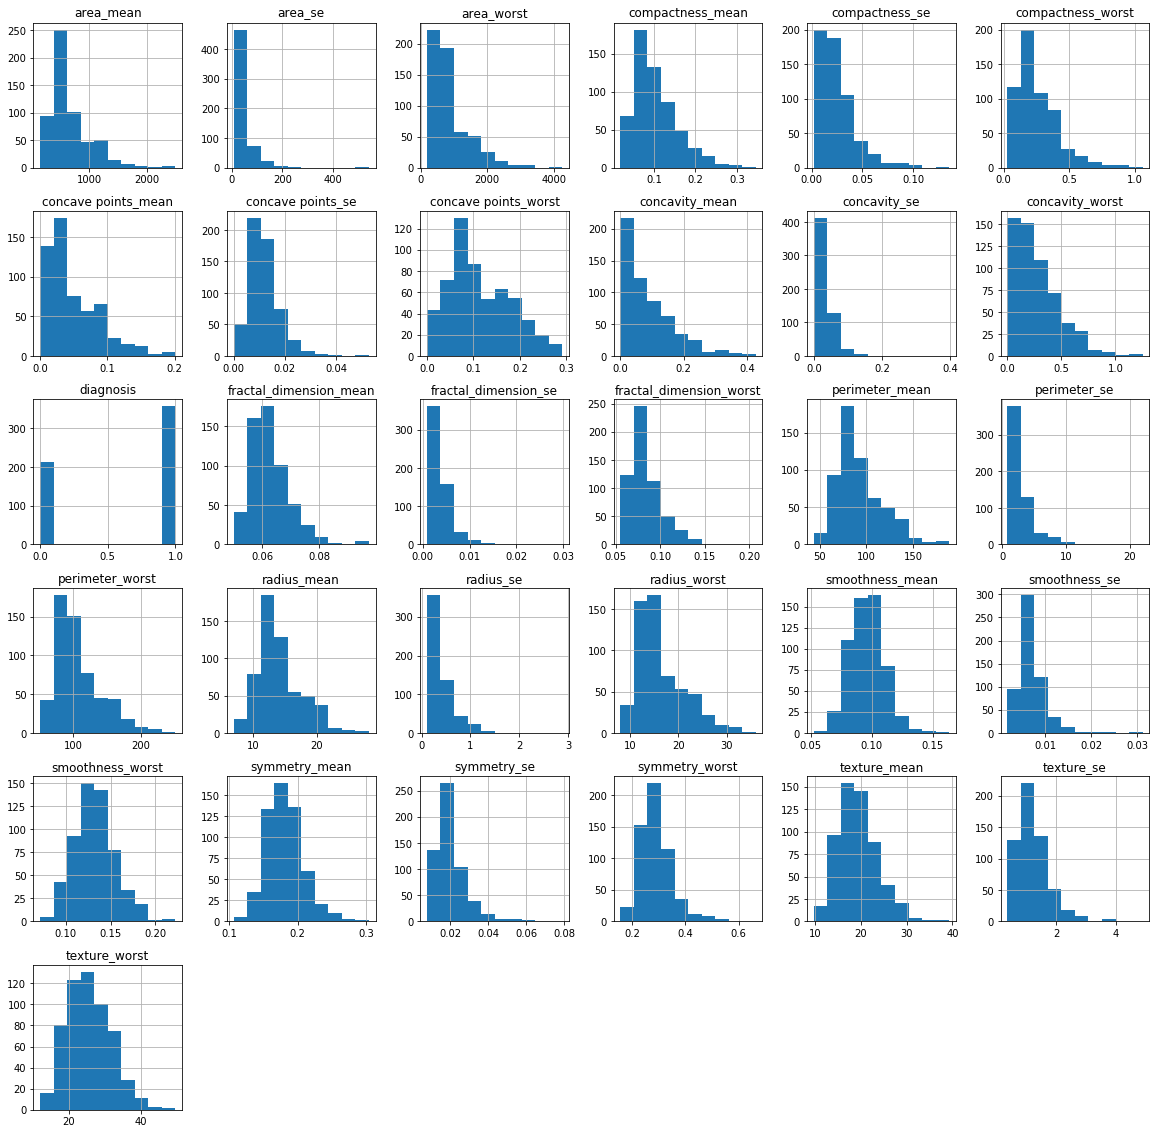

In [15]:
# plot histogram of each parameter
dataset.hist(figsize=(20,20))
plt.show()

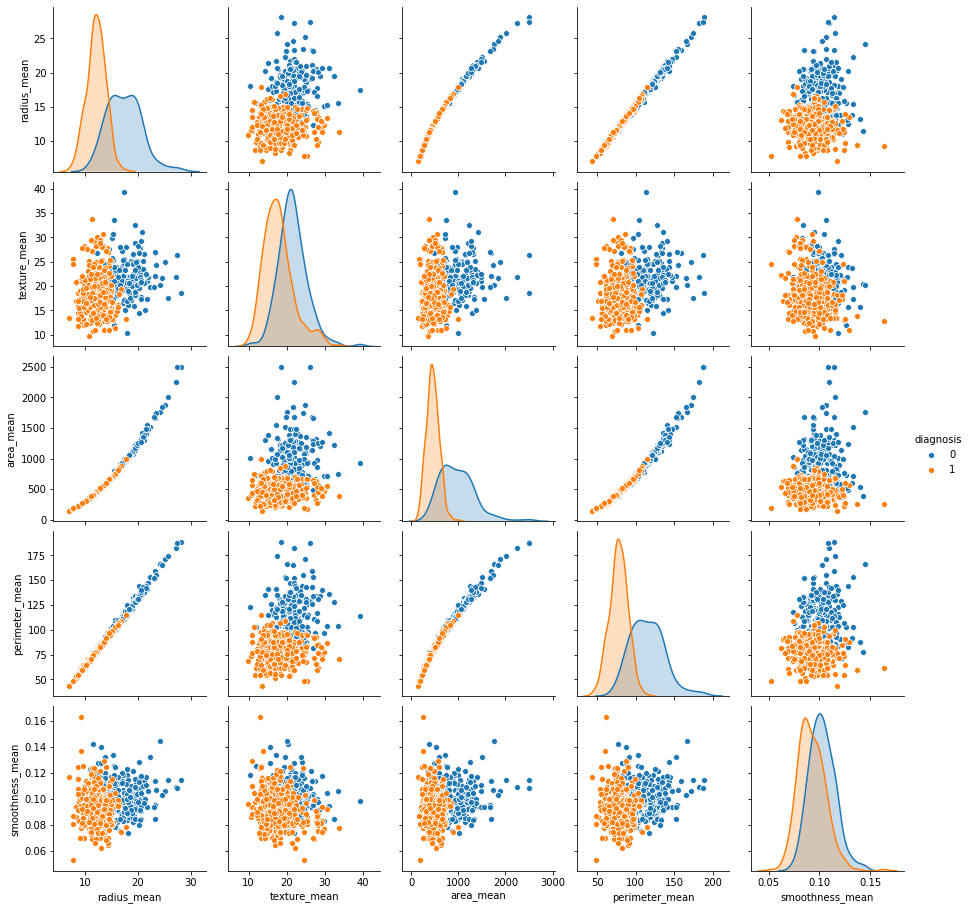

In [16]:
# pairplot
sns.pairplot(dataset, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )
plt.show()

diagnosis
0    212
1    357
dtype: int64


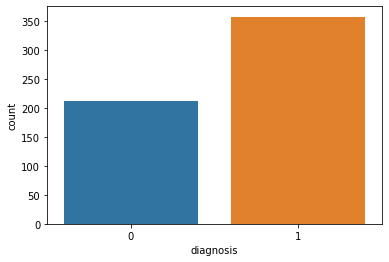

In [17]:
# count plot
print(dataset.groupby('diagnosis').size())
sns.countplot(dataset['diagnosis'], label = "Count") 
plt.show()

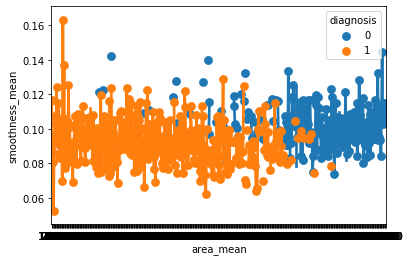

In [18]:
# pointplot
sns.pointplot(x = "area_mean", y = "smoothness_mean", hue = "diagnosis", data = dataset)
plt.show()

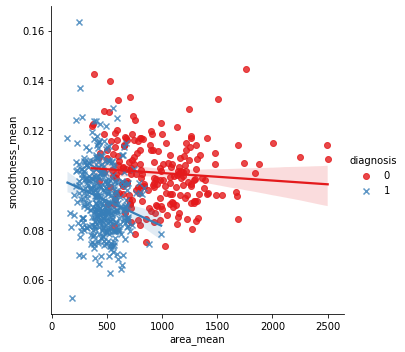

In [19]:
# line plot
sns.lmplot(x ="area_mean", y="smoothness_mean", hue ="diagnosis", data = dataset, 
           markers=["o", "x"], palette="Set1")

plt.show()

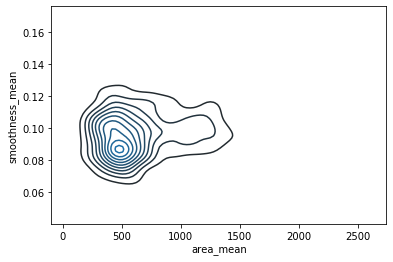

In [20]:
# kernel density estimates (kde plot)
sns.kdeplot(dataset['area_mean'], dataset['smoothness_mean']);

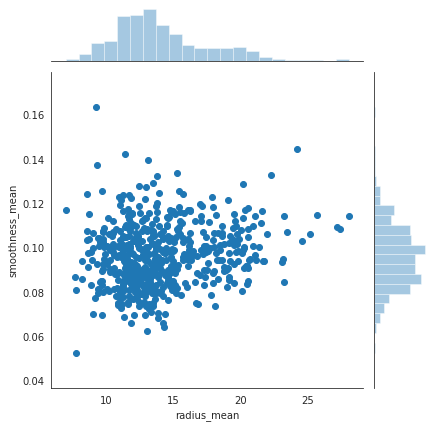

In [21]:
# jointplot without kde
# without kde, it will generate histogram
with sns.axes_style('white'):
    sns.jointplot("radius_mean", "smoothness_mean", dataset)

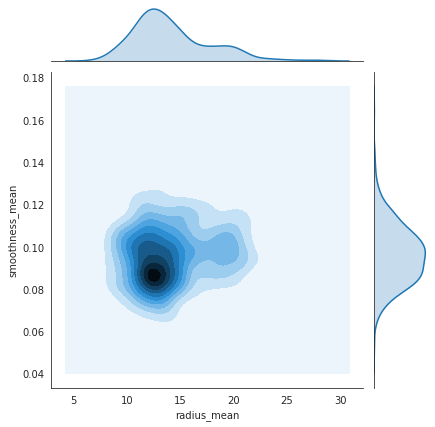

In [22]:
# jointplot with kde
with sns.axes_style('white'):
    sns.jointplot("radius_mean", "smoothness_mean", dataset, kind='kde')

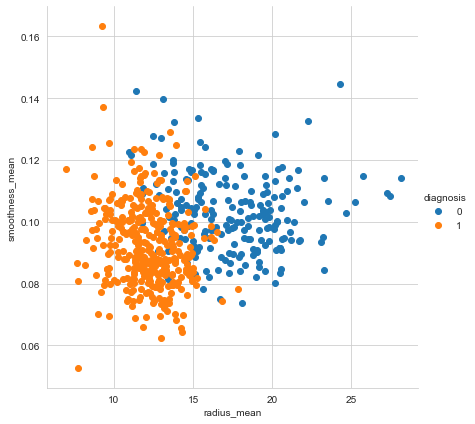

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="diagnosis", height = 6).map(plt.scatter, "radius_mean", "smoothness_mean").add_legend()
plt.show()

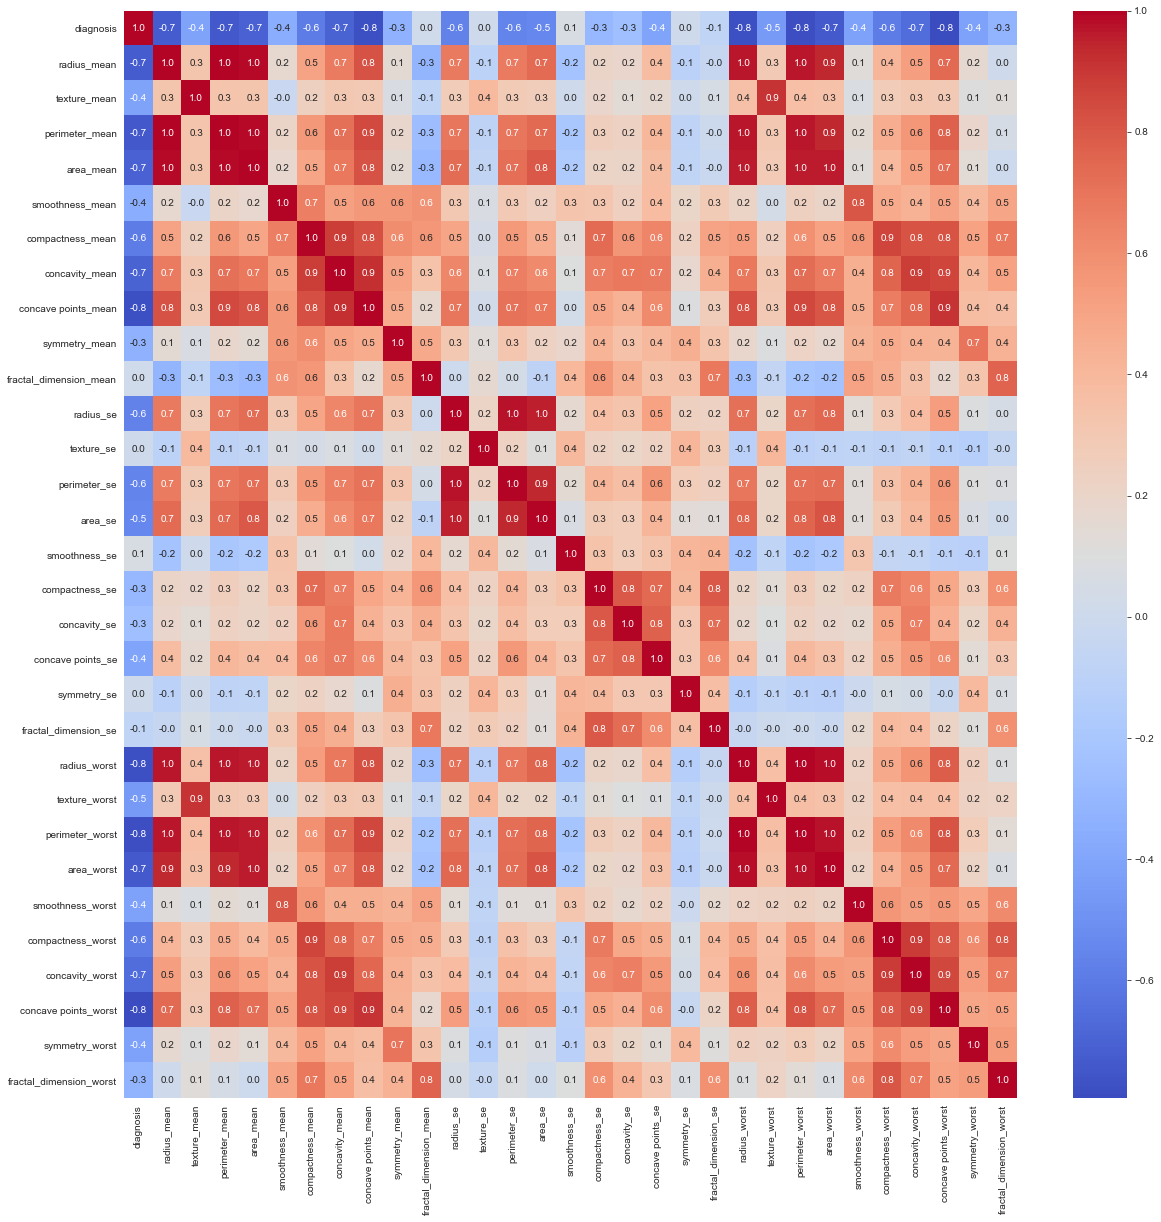

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f')

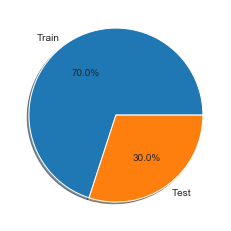

Train set (398, 31)
Test set (171, 31)


In [25]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(dataset, test_size = 0.3)
labels = 'Train', 'Test'
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

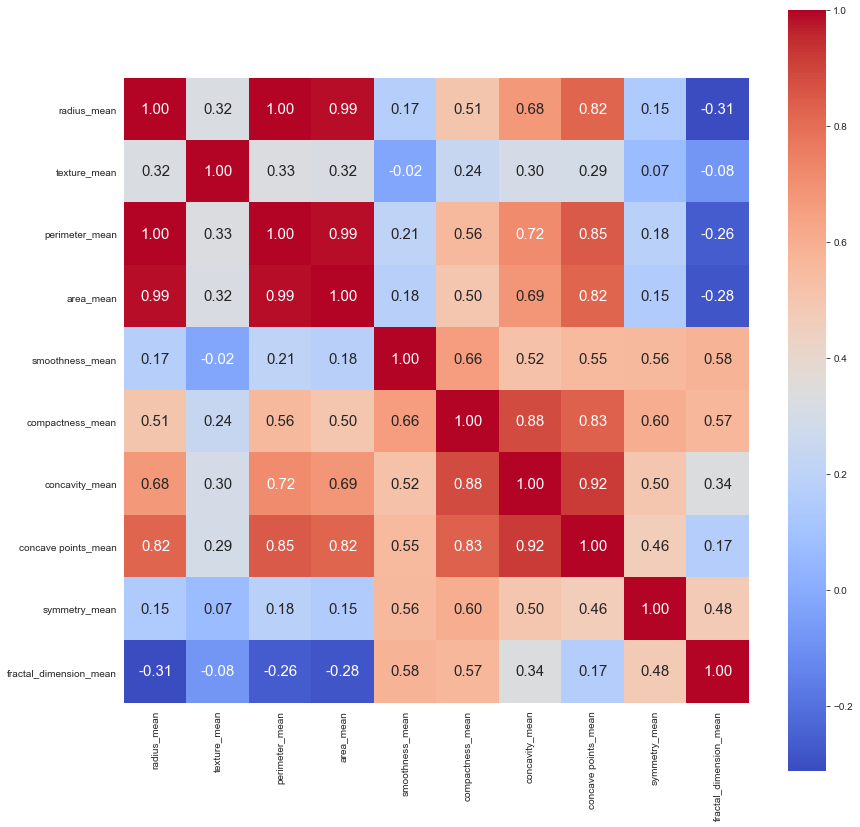

In [26]:
features_mean= list(dataset.columns[1:11])
corr = dataset[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

In [27]:
# conclusion
# the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them.
# compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
# so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

In [28]:
# Model Classification
# Making a generic function for making a classification model and later by accessing the performance
Y = dataset['diagnosis'].values
X = dataset.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

def classification_model(model, dataset, predictors, outcome):
    # Fit the model
    model.fit(dataset[predictors], dataset[outcome])
    
    # Make predictions on training set:
    predictions = model.predict(dataset[predictors])
    
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, dataset[outcome])
    print("Accuracy : %s" %"{0:.3%}".format(accuracy))
    
    # perform k-fold cross validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(dataset[predictors]):
        # Filter training set
        train_predictors = (dataset[predictors].iloc[train,:])
        
        # The target we're using to train the algorithm
        train_target = (dataset[outcome].iloc[train])
        
        # Training the algorithm using the predictors and target
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(dataset[predictors].iloc[test,:], dataset[outcome].iloc[test]))
        cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
        
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
        
        #Fit the model again so that it can be refered outside the function
        model.fit(dataset[predictors],dataset[outcome]) 

In [29]:
# Implementing Machine Learning Algorithms

In [30]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var='diagnosis'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 86.250%
Cross-Validation Score : 86.250%
Cross-Validation Score : 85.417%
Cross-Validation Score : 85.581%
Cross-Validation Score : 85.934%


In [31]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var='diagnosis'
model= KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 90.452%
Cross-Validation Score : 87.500%
Cross-Validation Score : 85.625%
Cross-Validation Score : 85.000%
Cross-Validation Score : 86.535%
Cross-Validation Score : 86.696%


In [32]:
# Support Vector Machine
from sklearn.svm import SVC
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var = 'diagnosis'
model= SVC()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.191%
Cross-Validation Score : 86.250%
Cross-Validation Score : 88.125%
Cross-Validation Score : 87.500%
Cross-Validation Score : 89.043%
Cross-Validation Score : 88.703%


In [33]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var = 'diagnosis'
model= BernoulliNB()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 62.563%
Cross-Validation Score : 58.750%
Cross-Validation Score : 63.125%
Cross-Validation Score : 63.333%
Cross-Validation Score : 63.323%
Cross-Validation Score : 62.557%


In [34]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var = 'diagnosis'
model= RandomForestClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 87.500%
Cross-Validation Score : 89.375%
Cross-Validation Score : 88.750%
Cross-Validation Score : 90.297%
Cross-Validation Score : 90.718%


In [35]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var = 'diagnosis'
model= AdaBoostClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 99.749%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.625%
Cross-Validation Score : 90.833%
Cross-Validation Score : 91.543%
Cross-Validation Score : 91.462%


In [36]:
from xgboost import XGBClassifier
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var = 'diagnosis'
model = XGBClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 98.744%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.750%
Cross-Validation Score : 88.750%
Cross-Validation Score : 89.980%
Cross-Validation Score : 89.959%


In [37]:
# Checking for run-time
Y = dataset['diagnosis'].values
X = dataset.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)
models_list = []
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', BernoulliNB()))
models_list.append(('RF', RandomForestClassifier()))
models_list.append(('AdaBoost', AdaBoostClassifier()))
models_list.append(('XGBoost', XGBClassifier()))
n_splits = 10
results = []
names = []
for name, model in models_list:
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s:(run time: %f)" % (name, end-start))

DT:(run time: 0.055512)
KNN:(run time: 0.040832)
SVM:(run time: 0.037968)
NB:(run time: 0.014951)
RF:(run time: 1.839476)
AdaBoost:(run time: 1.506563)
XGBoost:(run time: 1.566195)


In [38]:
# Counting 1 and 0 values

In [39]:
dataset.shape

(569, 31)

In [40]:
(dataset['diagnosis'][:398]==1).sum(),(dataset['diagnosis'][:398]==0).sum()

(225, 173)

In [41]:
(dataset['diagnosis'][398:]==1).sum(),(dataset['diagnosis'][398:]==0).sum()

(132, 39)

In [42]:
mat=dataset.to_numpy()
mat.shape
mat

array([[ 0.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 0.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 0.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 0.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 0.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [43]:
# Model Training
# Importing the libarires
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import plot_model

Using TensorFlow backend.


In [44]:
# Using 2 Sigmoid Layers and RMSprop Optimizer
model2 = Sequential()
model2.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model2.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history02 = model2.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128,verbose=0)

In [45]:
score2 = model2.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.010030871361316224
Train accuracy: 1.0


In [46]:
score2 = model2.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

Validation loss: 0.12478203940809819
Validation accuracy: 0.9415204524993896


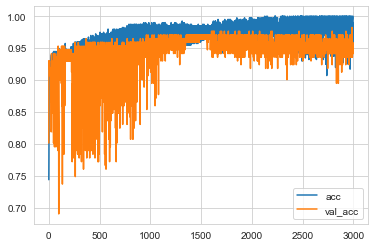

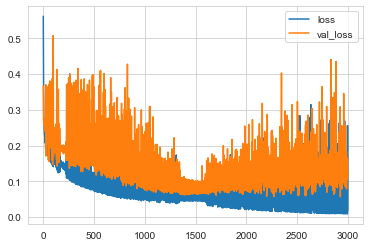

644


In [47]:
plt.plot(history02.history['accuracy'], label='acc')
plt.plot(history02.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history02.history['loss'], label='loss')
plt.plot(history02.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history02.history['accuracy']:
    if i>0.99:
        count+=1
print(count)


In [48]:
model2.save('model2.h5')
print("Avg Training acc: ", np.mean(history02.history['accuracy']),"\nAvg Testing acc: ", np.mean(history02.history['val_accuracy']))

Avg Training acc:  0.97296315 
Avg Testing acc:  0.9437621829311053


In [49]:
# Using 3 Sigmoid Layers and RMSprop optimizer
model3 = Sequential()
model3.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model3.add(Dense(500, activation='sigmoid', use_bias=True))
model3.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history03 = model3.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [50]:
score3 = model3.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score3[0])
print('Train accuracy:', score3[1])

Train loss: 0.009190610790714135
Train accuracy: 0.9974874258041382


In [51]:
score3 = model3.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score3[0])
print('Validation accuracy:', score3[1])

Validation loss: 0.14189722243021105
Validation accuracy: 0.9415204524993896


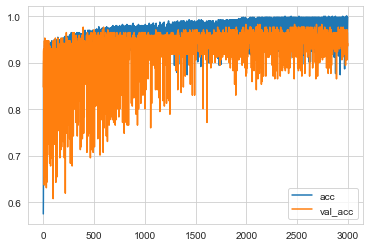

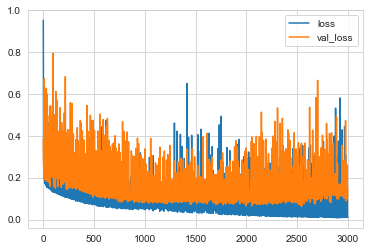

617


In [52]:
plt.plot(history03.history['accuracy'], label='acc')
plt.plot(history03.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history03.history['loss'], label='loss')
plt.plot(history03.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history03.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [53]:
model3.save('model3.h5')
print("Avg Training acc: ", np.mean(history03.history['accuracy']),"\nAvg Testing acc: ", np.mean(history03.history['val_accuracy']))

Avg Training acc:  0.96722203 
Avg Testing acc:  0.9300019511381785


In [54]:
# Using 4 Sigmoid Layers and RMSprop optimizer
model4 = Sequential()
model4.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history04 = model4.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [55]:
score4 = model4.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score4[0])
print('Train accuracy:', score4[1])

Train loss: 0.013853666798917147
Train accuracy: 0.9974874258041382


In [56]:
score4 = model4.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score4[0])
print('Validation accuracy:', score4[1])

Validation loss: 0.16598156146835863
Validation accuracy: 0.9298245906829834


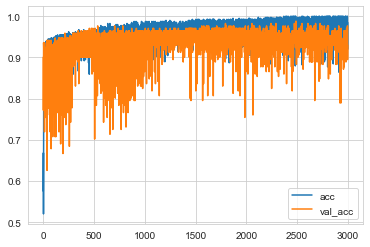

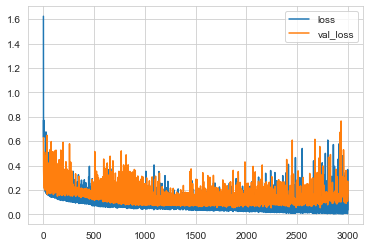

471


In [57]:
plt.plot(history04.history['accuracy'], label='acc')
plt.plot(history04.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history04.history['loss'], label='loss')
plt.plot(history04.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history04.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [58]:
model4.save('model4.h5')
print("Avg Training acc: ", np.mean(history04.history['accuracy']),"\nAvg Testing acc: ", np.mean(history04.history['val_accuracy']))

Avg Training acc:  0.9656592 
Avg Testing acc:  0.9346081891059875


In [59]:
# Using 4 Sigmoid Layers and SGD optimizer
model5 = Sequential()
model5.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model5.add(Dense(500, activation='sigmoid', use_bias=True))
model5.add(Dense(1, activation='sigmoid'))
keras.optimizers.SGD(lr=0.01)
model5.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history05 = model5.fit(mat[:,1:],mat[:,0], validation_split=0.3, shuffle=False, epochs=3000, batch_size=128, verbose=0)

In [60]:
score = model5.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.3696762188595144
Train accuracy: 0.8793969750404358


In [61]:
score = model5.evaluate(mat[398:,1:], mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.30508782867102596
Validation accuracy: 0.9239766001701355


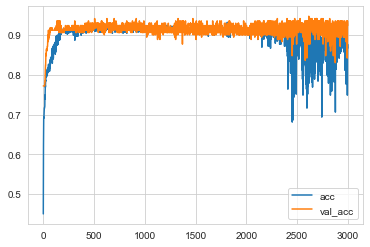

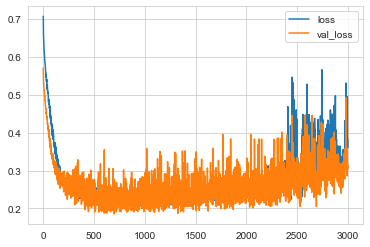

0


In [62]:
plt.plot(history05.history['accuracy'], label='acc')
plt.plot(history05.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history05.history['loss'], label='loss')
plt.plot(history05.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history05.history['accuracy']:
    if i>0.99:
        count+=1
print(count)


In [63]:
model5.save('model5.h5')
print("Avg Training acc: ", np.mean(history05.history['accuracy']), "\nAvg Testing acc: ", np.mean(history05.history['val_accuracy']))

Avg Training acc:  0.8992614 
Avg Testing acc:  0.9143157889445622


In [64]:
# Using 4 sigmoid layers and RMSprop Optimizer with batch shuffle
model6 = Sequential()
model6.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history06 = model6.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=True,epochs=3000, batch_size=128, verbose=0)

In [65]:
score = model6.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.41555851832706125
Train accuracy: 0.9145728349685669


In [66]:
score = model6.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.4846461739456445
Validation accuracy: 0.7777777910232544


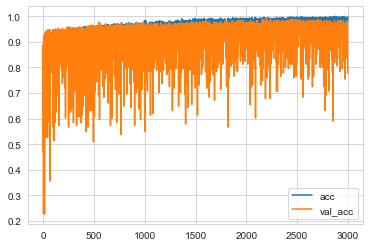

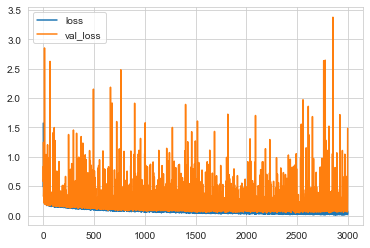

229


In [67]:
plt.plot(history06.history['accuracy'], label='acc')
plt.plot(history06.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history06.history['loss'], label='loss')
plt.plot(history06.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history06.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [68]:
model6.save('model6.h5')
print("Avg Training acc: ", np.mean(history06.history['accuracy']), "\nAvg Testing acc: ", np.mean(history06.history['val_accuracy']))

Avg Training acc:  0.9591457 
Avg Testing acc:  0.9129902554750442
